In [4]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import gym, gridworlds
matplotlib.style.use('ggplot')

%matplotlib inline

In [5]:
env = gym.make("gridworld-v0")
env.render()

[2017-10-09 15:44:01,513] Making new env: gridworld-v0


+-------+
| : : :*|
| :c: :c|
| : :r:c|
|x:c:c:c|
+-------+



In [6]:
def render_P(envP):
    nS, nA = len(envP), len(envP[0])
    P, R = np.zeros([nS, nA, nS]), np.zeros([nS, nA])
    
    for s in range(nS):
        for a in range(nA):
            for next_s in range(len(envP[s][a])):
                sp = envP[s][a][next_s][1]
                P[s,a,sp] = envP[s][a][next_s][0]
                R[s,a] = envP[s][a][0][2]
    return P, R

In [7]:
def construct_matrices(P, R, pi):
    nS, nA = len(P), len(P[0])
    P_pi = np.zeros([nS, nS])
    R_pi = np.sum(np.multiply(pi, R), axis=1)
    for s in range(nS):
        P_pi[s,:] = np.dot(pi, P[s,:,:])
    return R_pi, P_pi

def solve_MDP(P, R, pi, gamma):
    R_pi, P_pi = construct_matrices(P, R, pi)
    I = np.eye(len(R_pi))
    resolvent = np.linalg.inv(I - gamma * P_pi)
    v = np.dot(resolvent, R_pi)
    q = R + np.dot(P, v) #np.tile(np.dot(P_pi, self.v_target), (1, 4))
    return v, q

In [8]:
P, R = render_P(env.unwrapped.P)

In [9]:
DOWN, UP, RIGHT, LEFT = 0, 1, 2, 3 # the order in the environment
pi = [0, 0.5, 0.5, 0]
gamma = 0.9

In [10]:
v, q = solve_MDP(P, R, pi, gamma)

In [11]:
def render_into_grid(v, env):
    nS = len(v)
    v_grid = np.zeros([env.nR, env.nC])
    for s in range(nS):
        row, col = env.decode(s)
        if row < env.nR and col < env.nC:
            v_grid[row, col] = v[s]
    return v_grid

In [12]:
v

array([   3.74871076,    3.3084556 ,    2.30179028,  100.        ,
         -4.41565401,  -10.        ,   -0.17320972,  -10.        ,
         -0.31033563,    4.01873794,   19.75274313,  -10.        ,
         -4.54832249,  -10.        ,  -10.        ,  -10.        ,    0.        ])

In [13]:
v_grid = render_into_grid(v, env.unwrapped)

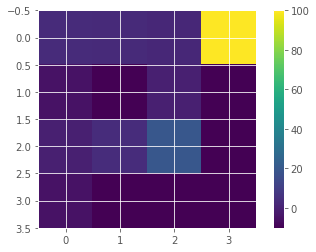

In [14]:
plt.imshow(v_grid)
plt.colorbar()